In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import src

FILE_IN="data/final/gnomad_snrna_variants_hwe_stats.tsv"

In [3]:
df = pd.read_csv(FILE_IN, sep="\t").check.shape().check.head()

<h5 style='text-align: left'><span style='color:None; background-color:None'>Shape: (52593, 21)</span></h5>

<h5 style='text-align: left'><span style='color:None; background-color:None'>First 5 rows</span></h5>

,chrom,pos,ref,alt,ac,an,af,nhomalt,allele_type,coi,symbol,ensg,gene_type,oe,het_obs,het_exp,chi2,chi2_pval,bfr_sig,rank_oe,rank_p
0,chr22,10736274,G,T,74963,149986,0.500,0,SNV,-0.999,U2,ENSG00000277248.1,snRNA,1.999,74963,37496.255,49916.236,0.000,True,1,1
1,chr22,10736246,T,C,33678,82306,0.409,0,SNV,-0.813,U2,ENSG00000277248.1,snRNA,1.813,33678,18577.501,15852.330,0.000,True,2,2
2,chr22,10736174,G,A,32745,81372,0.402,0,SNV,-0.804,U2,ENSG00000277248.1,snRNA,1.804,32745,18156.171,15089.183,0.000,True,3,3
3,chr21,9646988,A,G,49855,118206,0.422,90,SNV,-0.775,U1,ENSG00000275631.1,snRNA,1.775,49675,27979.594,22039.412,0.000,True,4,4
4,chr22,10736173,G,T,25899,77098,0.336,0,SNV,-0.677,U2,ENSG00000277248.1,snRNA,1.677,25899,15445.068,8848.281,0.000,True,5,5


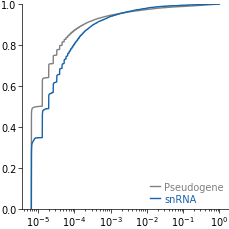

In [7]:
plt.style.use("src/default.mpltstyle")

fig, ax = plt.subplots(figsize=(6/2.54,6/2.54), layout="constrained")

dfg = df.groupby("gene_type")
snrna_color=plt.colormaps["Blues"](0.8)
pseudo_color="grey"
colors= [pseudo_color, snrna_color]

for (label, data), color in zip(dfg, colors):
    x = data["af"]
    ax.ecdf(x, color=color, label=label)

ax.set_xscale("log")
ax.legend(loc="best")

In [5]:
df.groupby("gene_type").agg(
    n_singletons=("ac", lambda x: (x == 1).sum()), n_variants=("ac", "size")
).assign(proportion_singletons=lambda x: x["n_singletons"] / x["n_variants"])

,n_singletons,n_variants,proportion_singletons
gene_type,,,
Pseudogene,21564,42857,0.503162
snRNA,3449,9736,0.354252
